In [ ]:
#10/06/25
#pip install tensorflow matplotlib
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

Normaliza los valores de pixeles de 0-255 a 0-1 (necesario para que la red aprenda mejor)

Entonces, una img en escala de grises de 28x28 tiene forma (28,28),
pero una CNN espera que todas las imgs tengan 3 dimensiones: (alto,ancho,canales)

In [ ]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

In [ ]:
X_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

Añade una dimension para representar el canal (1 canal escala de grises): de (28,28) a (28,28,1), como espera una CNN.

-1 significa: "agrega la nueva dimensional ultimo lugar".
¿Que es (28,28)?

Cuando cargas una img del conjunto MNIST, cada img tiene tamaño de:
28 pixeles de alto
28 pixeles de ancho

Esto representa la tupla (28,28) --> es una imagen bidimensional en la escala de grises.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),

    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#11/06/25
history = model.fit(X_train, X_train_cat,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.1)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 47s 27ms/step - accuracy: 0.9038 - loss: 0.3121 - val_accuracy: 0.9833 - val_loss: 0.0579
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9852 - loss: 0.0475 - val_accuracy: 0.9885 - val_loss: 0.0375
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 80s 27ms/step - accuracy: 0.9895 - loss: 0.0320 - val_accuracy: 0.9885 - val_loss: 0.0381
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.9934 - loss: 0.0208 - val_accuracy: 0.9887 - val_loss: 0.0416
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 28ms/step - accuracy: 0.9952 - loss: 0.0143 - val_accuracy: 0.9912 - val_loss: 0.0333


In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test_cat)
print(f"Precision en test: {test_acc:.2f}")
print("perdida:" + str(test_loss))

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.9860 - loss: 0.0401
Precision en test: 0.99
perdida:0.029394445940852165


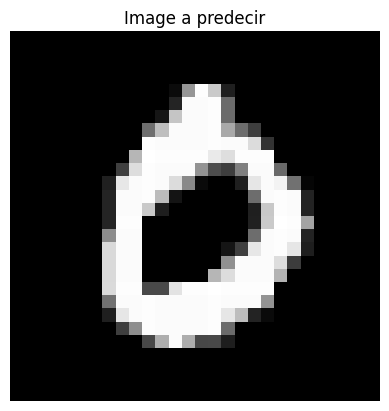

In [ ]:
import matplotlib.pyplot as plt # asegurate de tener esta linea
idx = 3
image = X_test[idx]

plt.imshow(image.squeeze(), cmap="gray")
plt.title("Image a predecir")
plt.axis("off")
plt.show()


In [ ]:
prediction = model.predict(np.expand_dims(image, axis=0))
print("Prediccion:", np.argmax(prediction))
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Prediccion: 0
[[9.9999678e-01 9.4388958e-12 2.5476794e-08 1.3959246e-09 3.5800835e-10
  1.0023874e-08 3.1141262e-06 1.8944875e-09 9.0127408e-08 7.8414949e-08]]


In [ ]:
#12/06/25
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [ ]:
print("Forma de X_train:", X_train.shape)
print("Forma de y_train:", y_train.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)

In [ ]:
import matplotlib.pyplot as plt

#Mostrar la primera imagen y su etiqueta
plt.imshow(X_train[902], cmap='gray')
plt.title(f'Etiqueta: {y_train[902]}')
plt.show()

In [ ]:
import numpy as np

unique, counts = np.unique(y_train, return_counts=True)
print("Distribucion de etiquetas (Train):")
for u, c in zip(unique, counts):
    print(f"Digito {u}: {c} imagenes")